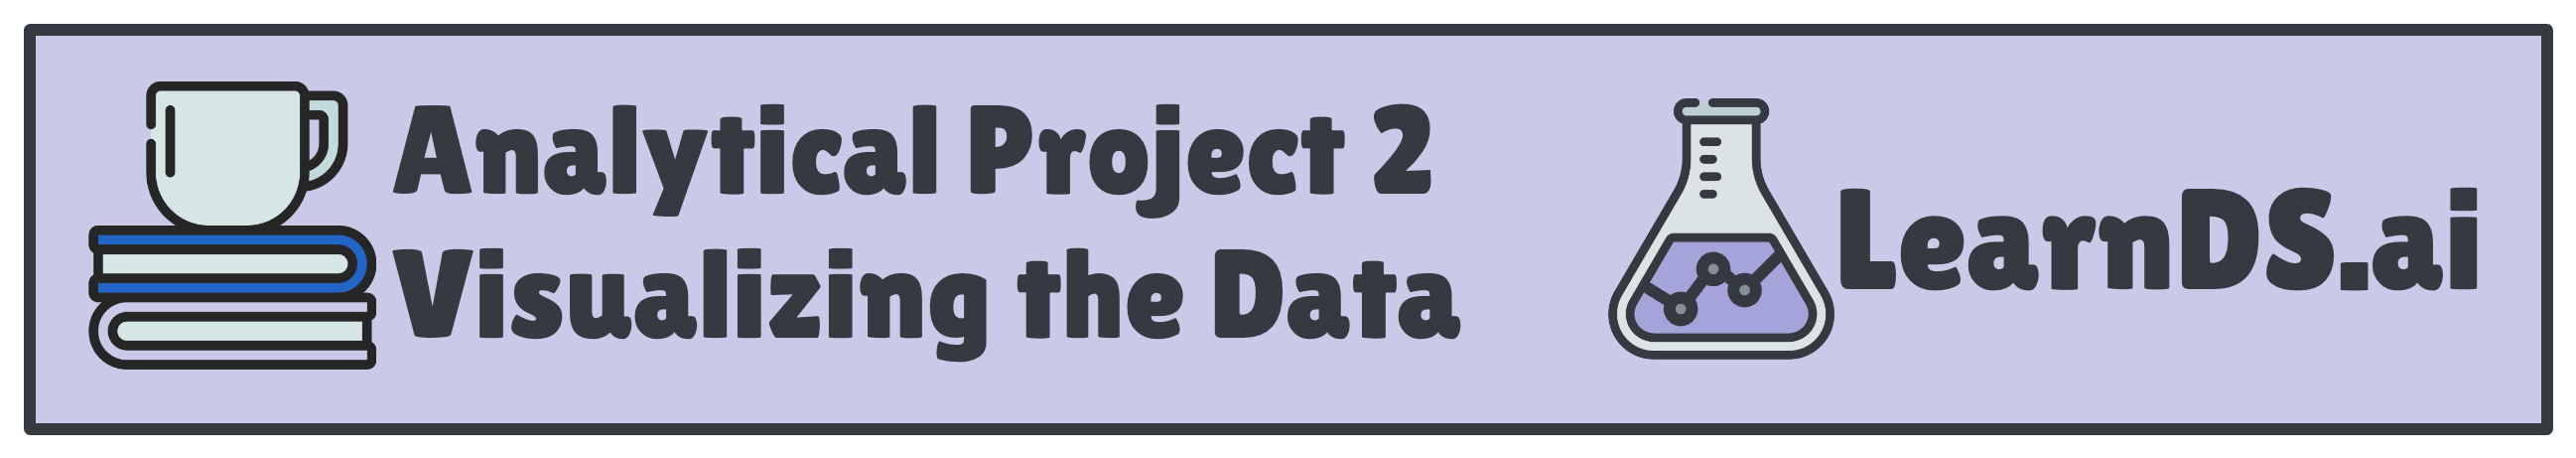

# Studying the Airbnb Dynamics in Barcelona - PART II DataViz


## Preparing our environment

In [5]:
!pip install numpy pandas matplotlib langdetect shapely seaborn scipy geopandas


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


## A simple matplotlib chart

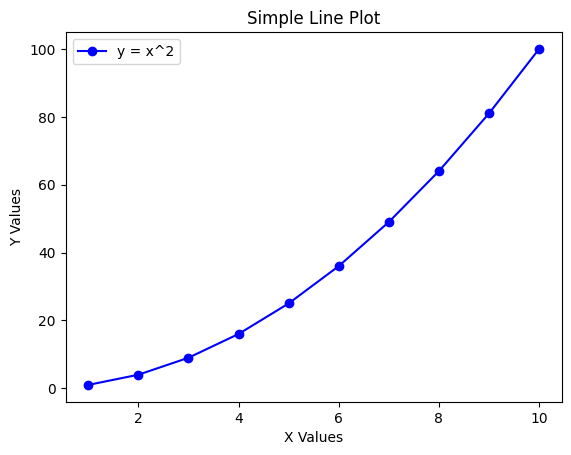

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
x = np.arange(1, 11) # X-axis values: 1 to 10
y = x ** 2           # Y-axis values: square of each x

# Create the line plotplt.plot(x, y, marker='o', linestyle='-', color='b', label='y = x^2')

# Create the line plot
plt.plot(x, y, marker='o', linestyle='-', color='b', label='y = x^2')

# Add labels and title
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Simple Line Plot')

# Add legend
plt.legend()

# Show the plot
plt.show()

## Visualizing our Data
Remember last week we started a small project of analyzing the activity of Airbnb in Barcelona. You can go check out the first part of the project in the following [GitHub repository with Part1.](https://github.com/rfeers/open-source-projects/blob/main/LearnDs.ai%20-%20Simple%20Analytical%20Project/PartI%20-%20Cleaning%20the%20Data.ipynb).

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization   
import os # to internact with our computer
from langdetect import detect # To detect the language of each record
import numpy as np

In [39]:
listings_lite_df = pd.read_csv("data/listings_lite.csv")


If you remember, we generated a simplified version of the dataset with fewer columns. 

In [41]:
listings_lite_df

,id,host_id,listing_url,room_type,neighbourhood_group_cleansed,price,accommodates,accommodates_group,minimum_nights,minimum_cost,minimum_cost_per_night,minimum_cost_per_night_and_person,n_amenities,review_scores_rating,latitude,longitude,number_of_apts,number_of_properties,lang
0,18674,71615,https://www.airbnb.com/rooms/18674,Entire home/apt,Eixample,119.0,8,Group,1,119.0,119.0,14.88,23,4.39,41.405560,2.172620,29,29,en
1,23197,90417,https://www.airbnb.com/rooms/23197,Entire home/apt,Sant Martí,219.0,5,Group,3,657.0,219.0,43.80,54,4.80,41.412432,2.219750,1,1,en
2,32711,135703,https://www.airbnb.com/rooms/32711,Entire home/apt,Gràcia,70.0,6,Group,1,70.0,70.0,11.67,36,4.44,41.405660,2.170150,3,3,ca
3,34241,73163,https://www.airbnb.com/rooms/34241,Entire home/apt,Ciutat Vella,118.0,2,Couple,31,3658.0,118.0,59.00,32,4.36,41.380620,2.175170,3,3,en
4,34981,73163,https://www.airbnb.com/rooms/34981,Entire home/apt,Ciutat Vella,203.0,9,Group,5,1015.0,203.0,22.56,40,4.53,41.379780,2.176230,3,3,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19450,1309247171291706908,32037490,https://www.airbnb.com/rooms/1309247171291706908,Entire home/apt,Ciutat Vella,102.0,6,Group,1,102.0,102.0,17.00,35,NaN,41.386210,2.175810,223,223,en
19451,1309247474940324391,32037490,https://www.airbnb.com/rooms/1309247474940324391,Entire home/apt,Ciutat Vella,102.0,6,Group,1,102.0,102.0,17.00,35,NaN,41.388124,2.175748,223,223,en
19452,1309249726656871437,32037490,https://www.airbnb.com/rooms/1309249726656871437,Entire home/apt,Ciutat Vella,78.0,3,Family,1,78.0,78.0,26.00,35,NaN,41.385883,2.177464,223,223,en
19453,1309250214543006367,32037490,https://www.airbnb.com/rooms/1309250214543006367,Entire home/apt,Ciutat Vella,78.0,3,Family,1,78.0,78.0,26.00,35,NaN,41.386320,2.177230,223,223,en


So now, let's analyze a bit the dataset. 

## Analysis 1 - Understanding the dynamics of Airbnb in Barcelona

### Distribution of accommodations per type
We know airbnb has for main types (room_types): 
- "Entire home/apt"
- "Private room"
- "Shared room"
- "Hotel room" (less common, but still present in some cities)

So let's generate a `bar chart`to visualize this. 

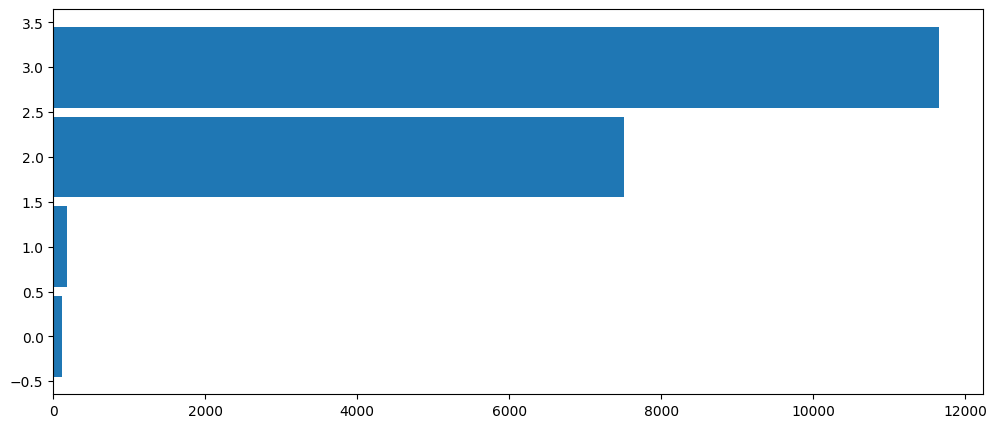

In [46]:
import matplotlib.pyplot as plt

# Compute the data
fig, ax = plt.subplots(figsize=(12, 5))  # Adjust figure size
bar_data = listings_lite_df['room_type'].value_counts().sort_values()

# Compute percentage values
total = sum(bar_data)
percentages = [(count / total) * 100 for count in bar_data]

# Define bar positions and width
bar_width = 0.9  # Reduce bar width to decrease spacing
y_positions = range(len(bar_data))

# Create the horizontal bar chart  -> This is why we are using barh. 
ax.barh(y_positions, bar_data, height=bar_width)

plt.show()

Now we have the basics but there are some important things missing: 
- Main Titlte (We don't know what's the chart about!!)
- x and y axis labels
- Categories (with colors) and legend!!

So let's add them. 

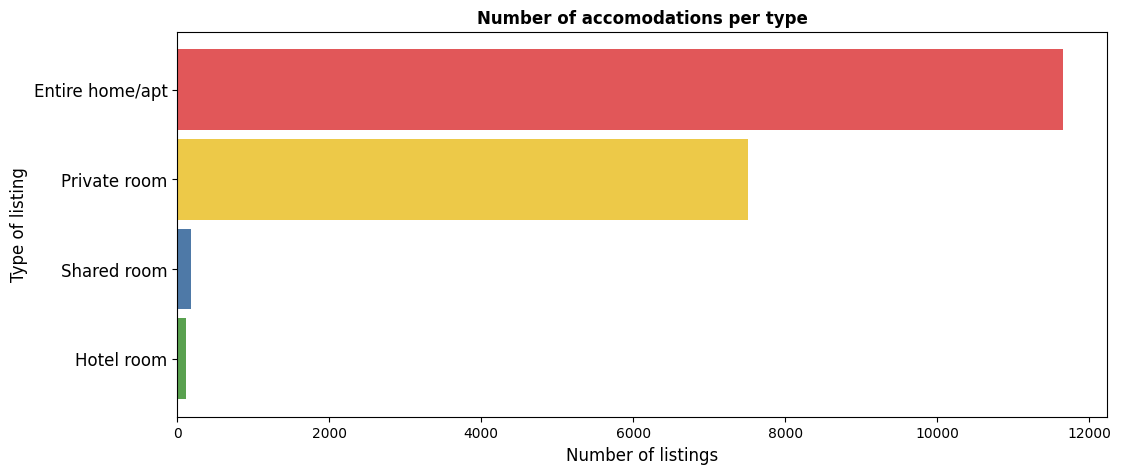

In [54]:
import matplotlib.pyplot as plt

# Compute the data
fig, ax = plt.subplots(figsize=(12, 5))  # Adjust figure size
bar_data = listings_lite_df['room_type'].value_counts().sort_values()

# Compute percentage values
total = sum(bar_data)
percentages = [(count / total) * 100 for count in bar_data]

# Define bar positions and width
bar_width = 0.9  # Reduce bar width to decrease spacing
y_positions = range(len(bar_data))

# Create the horizontal bar chart  -> This is why we are using barh. 
ax.barh(y_positions, bar_data, color=['#59A14F', '#4E79A7', '#EDC948','#E15759'], height=bar_width)

# Set title and remove x-axis label
ax.set_title('Number of accomodations per type', weight='bold')

# Adjust y-axis ticks to align with bars
ax.set_yticks(y_positions)
ax.set_yticklabels(bar_data.index, fontsize=12) # we add each category
ax.set_ylabel("Type of listing", fontsize=12) # we add each category

# We add the x label title
ax.set_xlabel("Number of listings", fontsize=12)

plt.show()

Now that our chart is nearly complete, let’s make it more visually appealing and easier to interpret:
- Add the proportion of each category to highlight their contribution to the total.
- Remove visual clutter such as the y-axis, axis labels, and borders for a cleaner look.

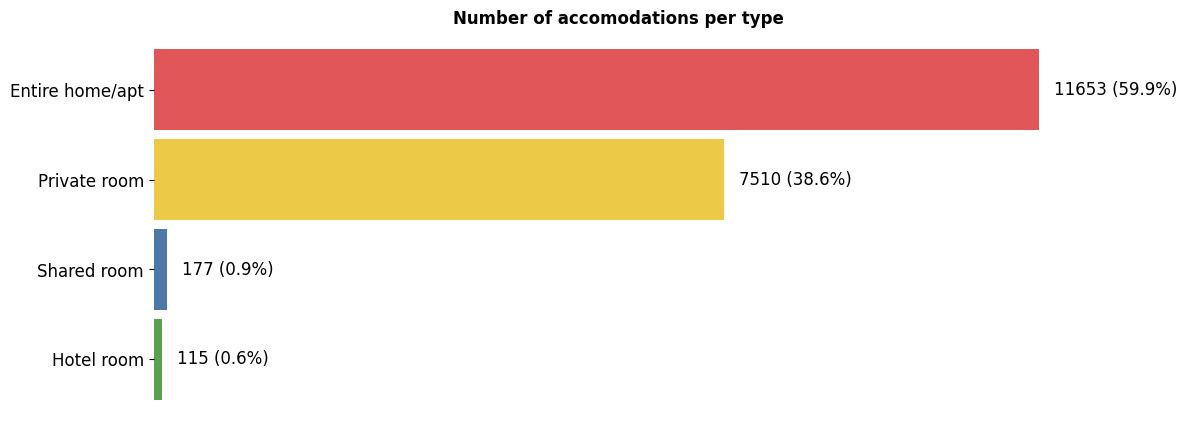

In [56]:
import matplotlib.pyplot as plt

# Compute the data
fig, ax = plt.subplots(figsize=(12, 5))  # Adjust figure size
bar_data = listings_lite_df['room_type'].value_counts().sort_values()

# Compute percentage values
total = sum(bar_data)
percentages = [(count / total) * 100 for count in bar_data]

# Define bar positions and width
bar_width = 0.9  # Reduce bar width to decrease spacing
y_positions = range(len(bar_data))

# Create the horizontal bar chart
ax.barh(y_positions, bar_data, color=['#59A14F', '#4E79A7', '#EDC948','#E15759'], height=bar_width)

# Add percentage labels next to bars
for i, (count, percent) in enumerate(zip(bar_data, percentages)):
    ax.text(count + total * 0.01, i, f'{count} ({percent:.1f}%)',
            ha='left', va='center', fontsize=12)

# Adjust y-axis ticks to align with bars
ax.set_yticks(y_positions)
ax.set_yticklabels(bar_data.index, fontsize=12)

# Remove x-axis (since labels are inside the bars)
ax.xaxis.set_visible(False)

# Remove borders for a clean look
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Set title and remove x-axis label
ax.set_title('Number of accomodations per type', weight='bold')

plt.show()

## Let's keep doing some more charts!

### Distributions of accomodations per neighborhood group (Distrito)

/var/folders/5h/h364vcws335c872gj8pv3jvm0000gn/T/ipykernel_15374/2972645989.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("coolwarm", len(bar_data))  # Choose a colormap (e.g., 'viridis', 'plasma', 'coolwarm')


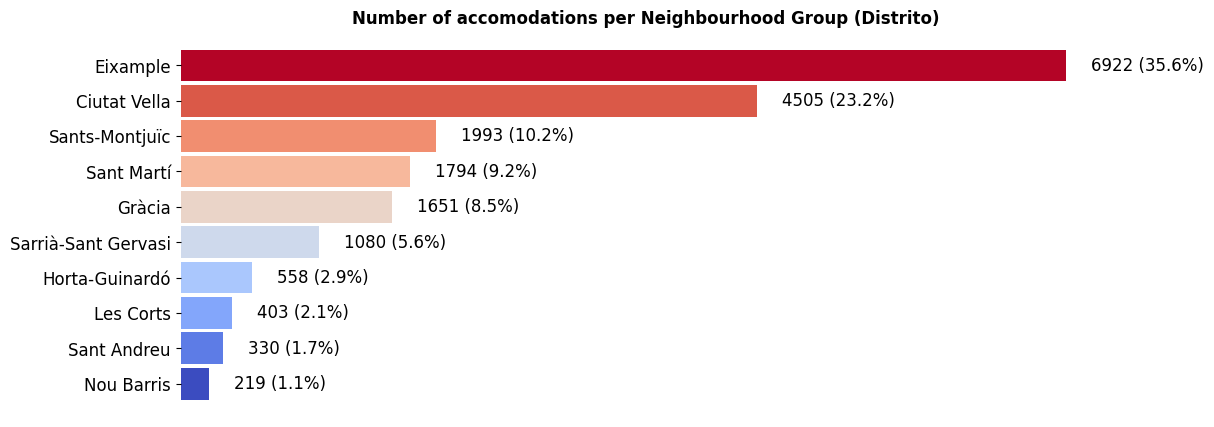

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Compute the data
fig, ax = plt.subplots(figsize=(12, 5))  # Adjust figure size
bar_data = listings_lite_df['neighbourhood_group_cleansed'].value_counts().sort_values()

# Compute percentage values
total = sum(bar_data)
percentages = [(count / total) * 100 for count in bar_data]

# Define bar positions and width
bar_width = 0.9  # Reduce bar width to decrease spacing
y_positions = range(len(bar_data))

# Generate gradient colors using a colormap
cmap = cm.get_cmap("coolwarm", len(bar_data))  # Choose a colormap (e.g., 'viridis', 'plasma', 'coolwarm')
colors = [cmap(i) for i in range(len(bar_data))]  # Generate a gradient color for each bar

# Create the horizontal bar chart
ax.barh(y_positions, bar_data, color=colors, height=bar_width)

# Add percentage labels next to bars
for i, (count, percent) in enumerate(zip(bar_data, percentages)):
    ax.text(count + total * 0.01, i, f'{count} ({percent:.1f}%)',
            ha='left', va='center', fontsize=12)

# Adjust y-axis ticks to align with bars
ax.set_yticks(y_positions)
ax.set_yticklabels(bar_data.index, fontsize=12)

# Remove x-axis (since labels are inside the bars)
ax.xaxis.set_visible(False)

# Remove borders for a clean look
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Set title and remove x-axis label
ax.set_title('Number of accomodations per Neighbourhood Group (Distrito)', weight='bold')

plt.show()

### Distribution of accomodations type for each neighborhood

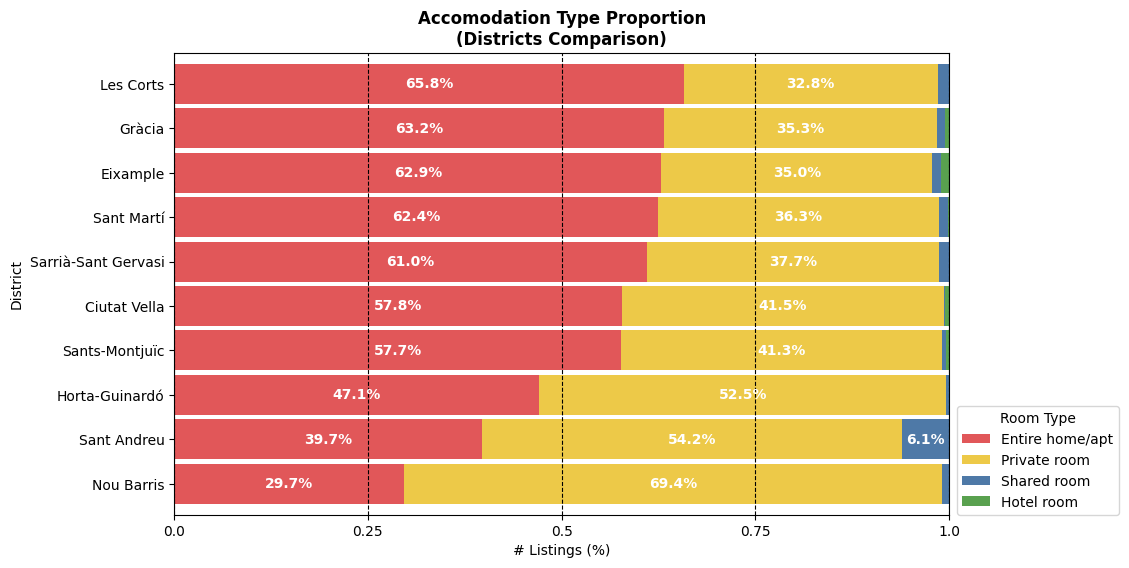

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Define custom colors for room types
colors = ['#E15759', '#EDC948', '#4E79A7', '#59A14F']  # Adjust order if needed

fig, ax = plt.subplots(figsize=(10, 6))

# Compute data for stacked bar chart
barplot_data = (
    listings_lite_df
    .groupby(['neighbourhood_group_cleansed', 'room_type'])
    .size()
    .unstack('room_type')
    .fillna(0)
    .apply(lambda row: row / row.sum(), axis=1)  # Convert to proportions
    .sort_values('Entire home/apt')  # Sort by 'Entire home/apt' values
    .reindex(columns=listings_lite_df['room_type'].value_counts().index)  # Keep original order
)

# Create the stacked horizontal bar chart with custom colors
bars = barplot_data.plot(kind='barh', width=0.9, stacked=True, ax=ax, color=colors)

# Add percentage labels inside bars
for i, district in enumerate(barplot_data.index):
    cumulative = 0  # Track the cumulative sum for positioning
    for j, room_type in enumerate(barplot_data.columns):
        value = barplot_data.loc[district, room_type]
        if value > 0.05:  # Only label segments > 5% to avoid overcrowding
            ax.text(cumulative + value / 2, i, f"{value:.1%}",  # Center of segment
                    ha='center', va='center', fontsize=10, color='white', fontweight='bold')
        cumulative += value  # Update cumulative position

# Format x-axis
ax.set_xticks(np.linspace(0, 1, 5))
ax.set_xticklabels(np.linspace(0, 1, 5))
ax.grid(axis='x', color='k', linestyle='--')  # Dashed grid lines for reference
ax.set_xlim(0, 1)

# Labels and title
ax.set_ylabel('District')
ax.set_xlabel('# Listings (%)')
ax.set_title('Accomodation Type Proportion\n(Districts Comparison)', weight='bold')

# Move legend outside the chart
ax.legend(loc=(1.01, 0), title="Room Type")

plt.show()


### Density of accomodations per Neighborhood Group.

In [60]:
import geopandas as gpd

bcn_neighborhood = gpd.read_file('data/neighbourhoods.geojson')

In [61]:
# We compute the area of each neighborhood
bcn_neighborhood["area"] = bcn_neighborhood.area
bcn_neighborhood

# We convert it into a pandas serie
areas_ser = (
    bcn_neighborhood
    .groupby('neighbourhood_group')
    ['area']
    .sum() * 10**4)

# We get the number of accomodations per district
n_listings_per_district = (
    listings_lite_df['neighbourhood_group_cleansed']
     .value_counts())


/var/folders/5h/h364vcws335c872gj8pv3jvm0000gn/T/ipykernel_15374/349145418.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bcn_neighborhood["area"] = bcn_neighborhood.area


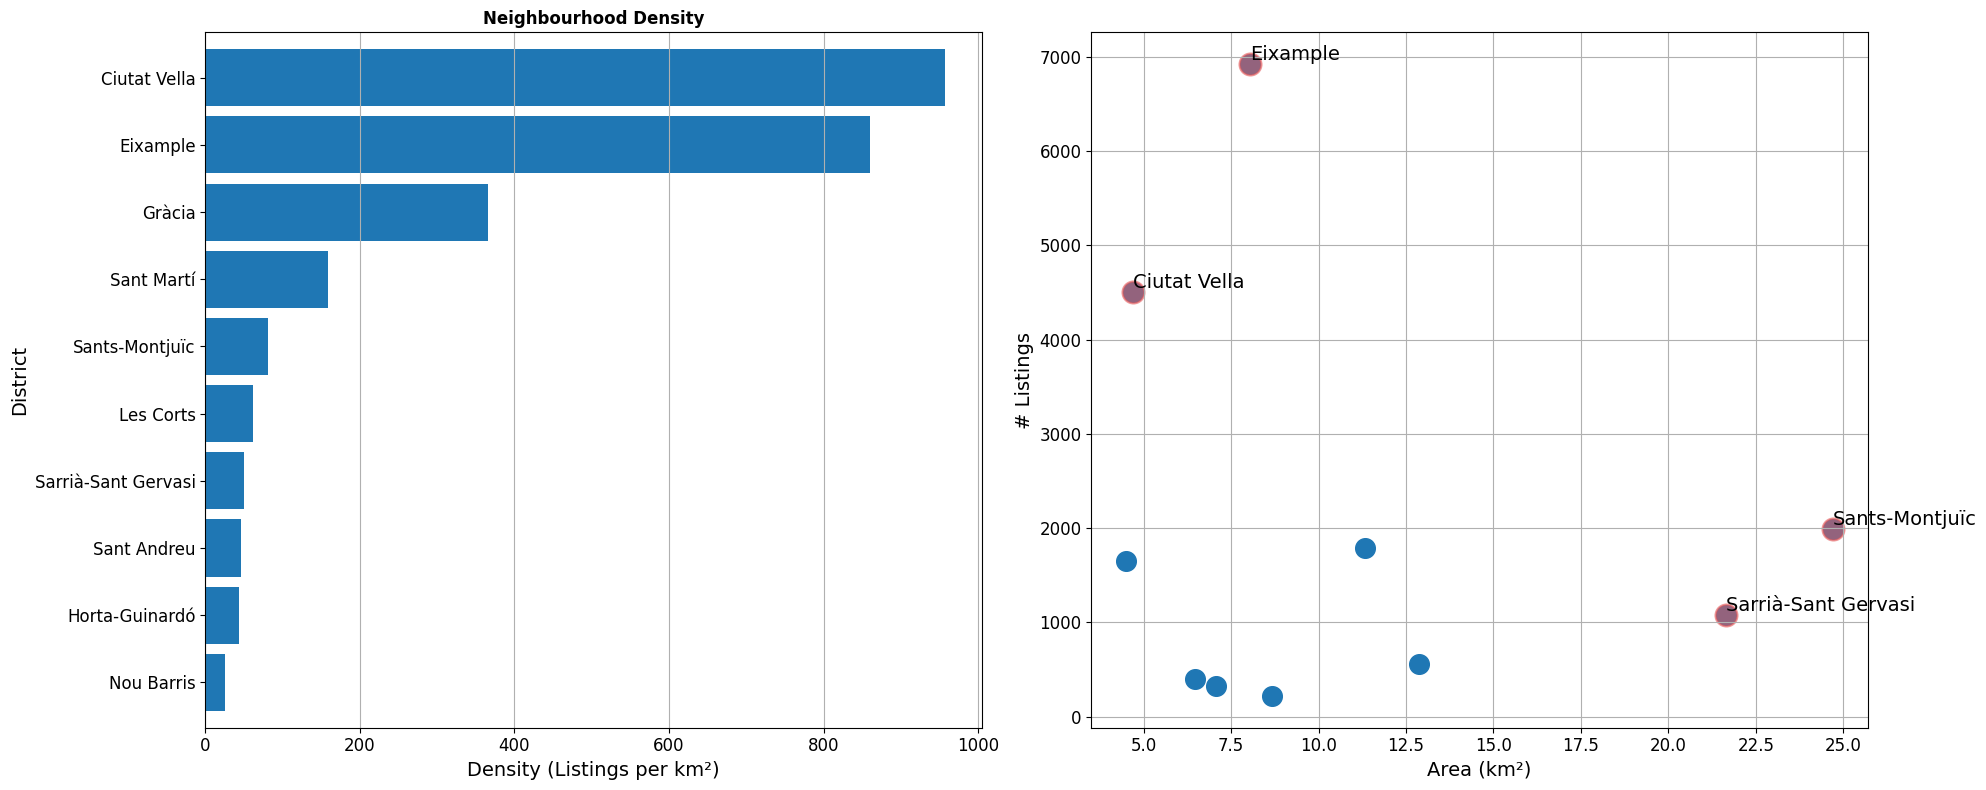

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Neighbourhood density
n_listings_per_district.divide(areas_ser).sort_values().plot(kind='barh', width=0.85, ax=ax1)
ax1.set_xlabel('Density (Listings per km²)', fontsize=14)
ax1.set_ylabel('District', fontsize=14)
ax1.set_title('Neighbourhood Density', weight='bold')
ax1.tick_params(axis='both', labelsize=12)
ax1.grid(axis='x')

# Plot 2: Scatter plot (Area vs # of Listings)
scatter_data = pd.concat([n_listings_per_district.rename('n_listings'), areas_ser], axis=1, sort=False)

scatter_data.plot(kind='scatter', x='area', y='n_listings', s=200, ax=ax2)

ax2.set_xlabel('Area (km²)', fontsize=14)
ax2.set_ylabel('# Listings', fontsize=14)
ax2.tick_params(axis='both', labelsize=12)
ax2.grid(which='both')

# We highlight those neighborhoods with the highest and lowest density.

highlight_districts = ["Eixample", "Ciutat Vella", "Sarrià-Sant Gervasi", "Sants-Montjuïc"]
# Overlay scatter points for highlighted districts
for district in highlight_districts:
    x = scatter_data.loc[district, 'area']
    y = scatter_data.loc[district, 'n_listings']
    ax2.scatter(x, y, s=250, color='#E15759', alpha=0.6, linewidth=1.5)
    ax2.text(*scatter_data.loc[district].values[::-1], district, fontsize=14, ha='left', va='bottom')



# Add labels for each scatter point in ax4
# for i, row in scatter_data.iterrows():
#     ax4.text(row['area'], row['n_listings'], i, fontsize=10, ha='right', va='bottom', fontweight='bold')

# Improve layout
fig.tight_layout()
plt.show()

Now let's focus on the onwers (or hosts!)

### Hosts - What do they do?

In [63]:
number_hosts = listings_lite_df['host_id'].nunique()
number_listings = listings_lite_df['id'].nunique()
mean_listings_per_host = np.round(number_listings / number_hosts,1)

print(f"There's a total of {number_hosts} hosts in Barcelona with a total of {number_listings} accomodations and an average of {mean_listings_per_host} accomodations per host.")

There's a total of 7025 hosts in Barcelona with a total of 19455 accomodations and an average of 2.8 accomodations per host.


Now let's delete the hotel rooms, as they might bias our data...

In [64]:
listings_lite_df_apts = listings_lite_df[listings_lite_df["room_type"]=='Entire home/apt']
number_hosts = listings_lite_df_apts['host_id'].nunique()
number_listings = listings_lite_df_apts['id'].nunique()
mean_listings_per_host = np.round(number_listings / number_hosts,1)

print(f"There's a total of {number_hosts} hosts in Barcelona with a total of {number_listings} accomodations and an average of {mean_listings_per_host} accomodations per host.")

There's a total of 3363 hosts in Barcelona with a total of 11653 accomodations and an average of 3.5 accomodations per host.


Surprise!! If we only keep whole apartments, this average increases... quite a lot!

In [65]:
number_hosts_nhg = listings_lite_df_apts.groupby("neighbourhood_group_cleansed")['host_id'].nunique()
number_apts_nhg = listings_lite_df_apts.groupby("neighbourhood_group_cleansed")['id'].nunique()

number_hosts_nhg_df = pd.DataFrame(number_hosts_nhg)
number_apts_nhg_df = pd.DataFrame(number_apts_nhg)

merged = number_hosts_nhg_df.merge(number_apts_nhg_df, on="neighbourhood_group_cleansed")
merged.rename(columns={"host_id": "num_hosts", "id": "num_apts"}, inplace=True)
merged["apts_per_host"] = merged.apply(lambda x: round(x["num_apts"] / x["num_hosts"],1), axis=1) # We use apply to compute the mean number of apts per host. Axis = 1 applies the function row-wise. 
merged

,num_hosts,num_apts,apts_per_host
neighbourhood_group_cleansed,,,
Ciutat Vella,1027,2605,2.5
Eixample,1191,4352,3.7
Gràcia,459,1043,2.3
Horta-Guinardó,182,263,1.4
Les Corts,119,265,2.2
Nou Barris,47,65,1.4
Sant Andreu,78,131,1.7
Sant Martí,572,1120,2.0
Sants-Montjuïc,531,1150,2.2


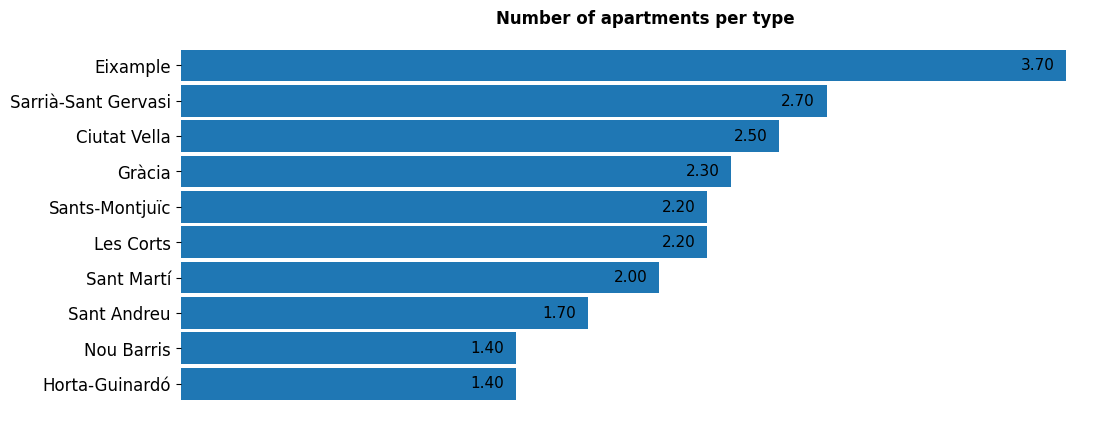

In [66]:
import matplotlib.pyplot as plt

# Compute the data
fig, ax = plt.subplots(figsize=(12, 5))  # Adjust figure size
bar_data = merged["apts_per_host"].sort_values(ascending=True)

# Define bar positions and width
bar_width = 0.9  # Reduce bar width to decrease spacing
y_positions = range(len(bar_data))

# Add value labels to the left of each bar
for i, value in enumerate(bar_data):
    ax.text(
        x= value - 0.05,  # slightly to the left of x=0
        y=i,
        s=f"{value:.2f}",  # format as 2 decimal places
        va='center',
        ha='right',
        fontsize=11,
        color='black'
    )

# Create the horizontal bar chart
ax.barh(y_positions, bar_data, height=bar_width)

# Adjust y-axis ticks to align with bars
ax.set_yticks(y_positions)
ax.set_yticklabels(bar_data.index, fontsize=12)

# Remove x-axis (since labels are inside the bars)
ax.xaxis.set_visible(False)


# Remove borders for a clean look
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.label_outer()

# Set title and remove x-axis label
ax.set_title('Number of apartments per type', weight='bold')

plt.show()

Let's see if this is equally shared!

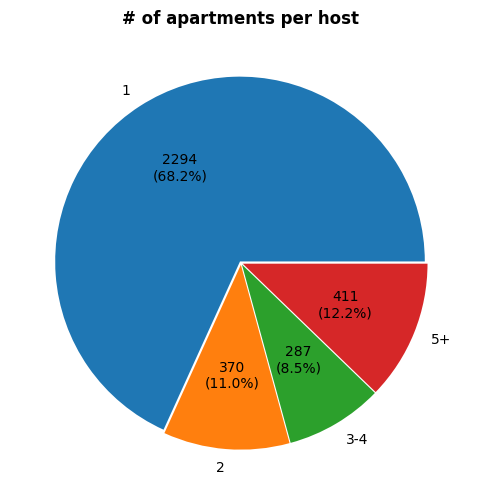

In [67]:
fig, ax = plt.subplots(figsize=(6,6))

n_listings_per_user = listings_lite_df_apts.groupby('host_id').size()

# Cut into bins and count
pie_data = (
    n_listings_per_user
    .pipe(pd.cut, bins=[1,2,3,5,1000], include_lowest=True, right=False,
          labels=['1', '2', '3-4', '5+'])
    .value_counts()
)

# Define the desired order explicitly
pie_data = pie_data.reindex(['1', '2', '3-4', '5+'])

# Plot the pie chart
pie_data.plot(
    kind='pie',
    explode=(0.01,) * len(pie_data),
    autopct=lambda v: (
        '{}'.format(int(v/100*sum(pie_data))) +
        '\n' + '({:.1%})'.format(v/100)),
    ax=ax
)

ax.set_ylabel('')
ax.set_title('# of apartments per host', weight='bold')
plt.show()


### Comparison of number of accomodations per host

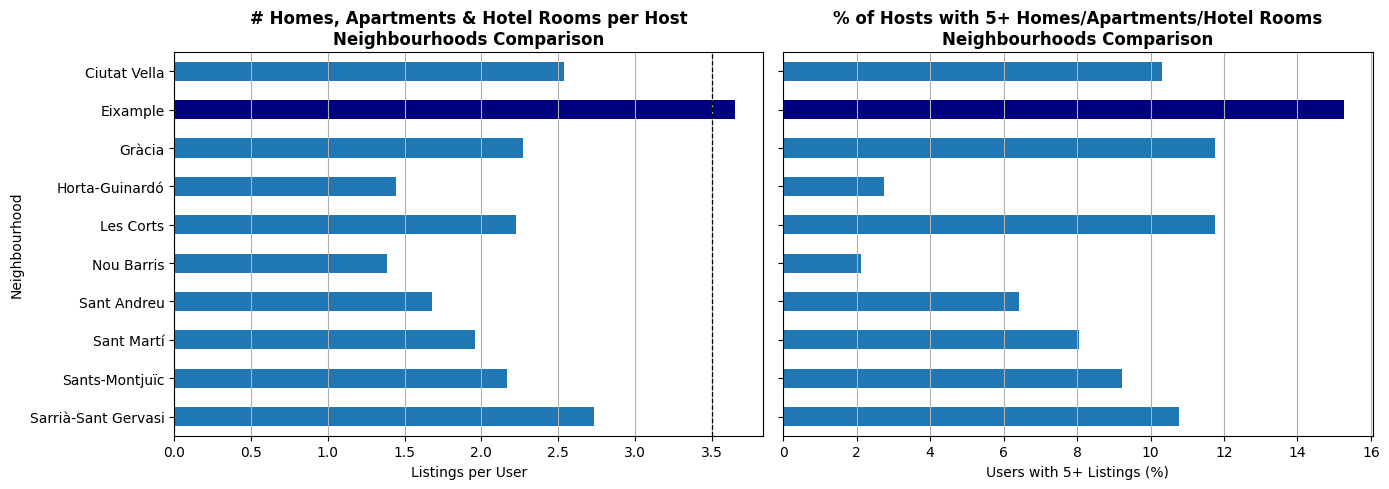

In [68]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5), sharey=True)

hosts_per_neighbourhood = listings_lite_df_apts.groupby('neighbourhood_group_cleansed')['host_id'].nunique()

listings_per_host_per_neighbourhood = (
    (listings_lite_df_apts
    .groupby('neighbourhood_group_cleansed')
    .size() / hosts_per_neighbourhood)
    .iloc[::-1]
)

multiple_listings_perc_per_neighbourhood = (
    (listings_lite_df_apts
    .groupby(['neighbourhood_group_cleansed', 'host_id'])
    .size().ge(5)
    .groupby('neighbourhood_group_cleansed')
    .sum() / hosts_per_neighbourhood)
    .iloc[::-1]
)*100

(listings_per_host_per_neighbourhood
 .plot(kind='barh', color=[sns.color_palette()[0] 
                           if n != 'Eixample' else 'navy' 
                           for n in listings_per_host_per_neighbourhood.index], ax=ax1))

(multiple_listings_perc_per_neighbourhood
 .plot(kind='barh', color=[sns.color_palette()[0] 
                           if n != 'Eixample' else 'navy' 
                           for n in multiple_listings_perc_per_neighbourhood.index], ax=ax2))

ax1.grid(axis='x')
ax2.grid(axis='x')
ax1.set_ylabel('Neighbourhood')
ax1.set_xlabel('Listings per User')
ax2.set_ylabel('Neighbourhood')
ax2.set_xlabel('Users with 5+ Listings (%)')
ax1.axvline(3.5, c='k', ls='--', lw=.9)

ax1.set_title('# Homes, Apartments & Hotel Rooms per Host\nNeighbourhoods Comparison', weight='bold')
ax2.set_title('% of Hosts with 5+ Homes/Apartments/Hotel Rooms\nNeighbourhoods Comparison', weight='bold')

fig.tight_layout()
plt.show()

In [69]:
number_apts_host = listings_lite_df_apts.groupby("host_id")['id'].nunique()
number_apts_host_df = pd.DataFrame(number_apts_host).reset_index().rename(columns={"id":"num_apts"})
number_hosts_with_n_apts = pd.DataFrame(number_apts_host_df.groupby("num_apts")["host_id"].nunique()).reset_index().rename(columns={"host_id":"num_hosts"})

def num_apts_categories(x):
    if x<10:
        return str(x)
    elif x>= 10 and x <20:
        return "10-20"
    elif x>= 20 and x <30:
        return "20-30"
    elif x>= 30 and x <40:
        return "30-40"
    elif x>= 40 and x <50:
        return "40-50"
    else: 
        return "50+"
    
number_hosts_with_n_apts["num_apts_category"] = number_hosts_with_n_apts.apply(lambda x: num_apts_categories(x["num_apts"]), axis=1)
bar_data = number_hosts_with_n_apts.groupby("num_apts_category")["num_hosts"].sum()
    

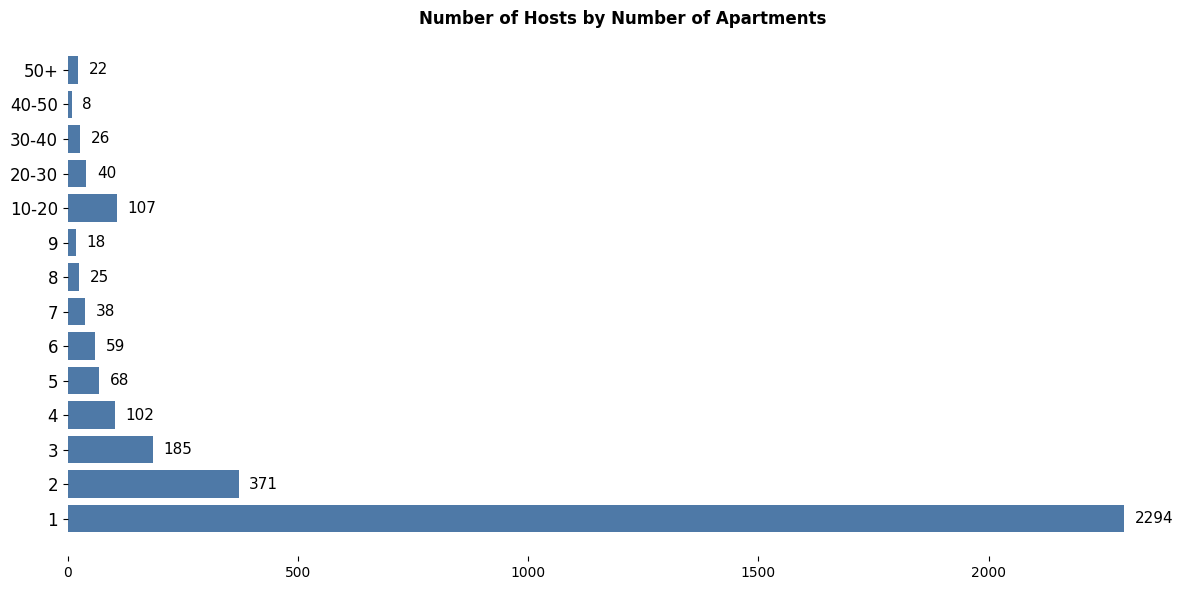

In [70]:
import matplotlib.pyplot as plt

ordered_categories = [str(i) for i in range(1, 10)] + ["10-20", "20-30", "30-40", "40-50", "50+"]


# Group and reindex to enforce category order
bar_data = (
    number_hosts_with_n_apts
    .groupby("num_apts_category")["num_hosts"]
    .sum()
    .reindex(ordered_categories)
    .dropna()  # optional: remove missing bins if some categories aren't present
)

# Create the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Define bar positions and width
bar_width = 0.8
y_positions = range(len(bar_data))

# Plot horizontal bars
ax.barh(y_positions, bar_data, height=bar_width, color='#4E79A7')

# Add value labels to the right of each bar
for i, value in enumerate(bar_data):
    ax.text(
        x=value + max(bar_data) * 0.01,  # just to the right of the bar
        y=i,
        s=f"{value:.0f}",  # format as integer
        va='center',
        ha='left',
        fontsize=11,
        color='black'
    )

# Set y-tick labels to category names
ax.set_yticks(y_positions)
ax.set_yticklabels(bar_data.index, fontsize=12)

# Hide x-axis line and ticks (optional)
ax.xaxis.set_visible(True)  # show or hide as needed

# Remove borders for a clean look
for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)

# Set title
ax.set_title('Number of Hosts by Number of Apartments', weight='bold')

plt.tight_layout()
plt.show()

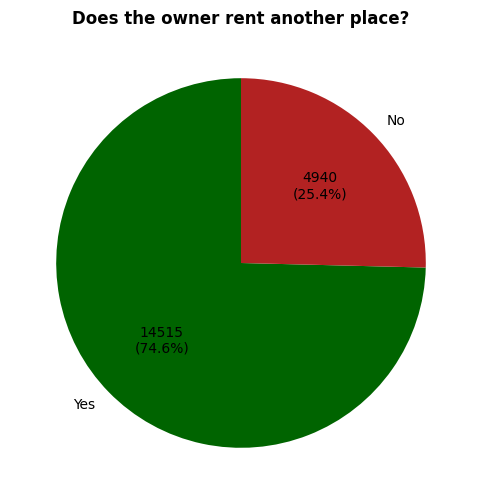

In [71]:
fig, ax = plt.subplots(figsize=(6,6))

pie_data = (
    listings_lite_df['host_id']
    .map(listings_lite_df.groupby('host_id').size() > 1).value_counts())

pie_data.plot(
    kind='pie', labels=['Yes', 'No'], colors=['darkgreen', 'firebrick'], 
    autopct=lambda v: (
                  '{}'.format(int(v/100*sum(pie_data))) +
                  '\n' + '({:.1%})'.format(v/100)),
    startangle=90, ax=ax)

ax.set_ylabel('')
ax.set_title('Does the owner rent another place?', weight='bold')

plt.show()

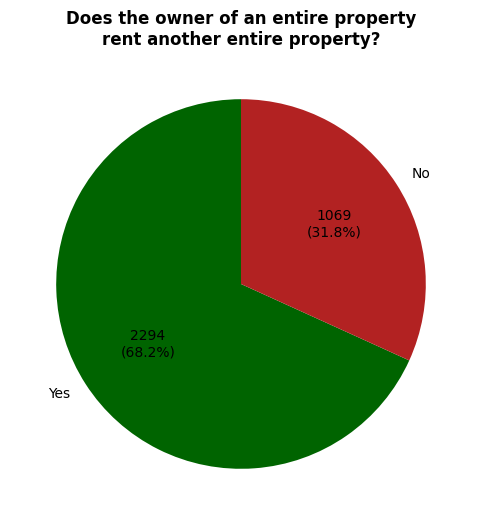

In [72]:
fig, ax = plt.subplots(figsize=(6,6))

pie_data = (
    listings_lite_df[
        listings_lite_df['room_type'].isin(['Entire home/apt'])]
    .groupby('host_id')
    .size()
    .gt(1)
    .value_counts())

pie_data.plot(
    kind='pie', labels=['Yes', 'No'], colors=['darkgreen', 'firebrick'], 
    autopct=lambda v: (
                  '{}'.format(int(v/100*sum(pie_data))) +
                  '\n' + '({:.1%})'.format(v/100)),
    startangle=90, ax=ax)

ax.set_ylabel('')
ax.set_title('Does the owner of an entire property\nrent another entire property?', weight='bold')

plt.show()